<a href="https://colab.research.google.com/github/Deeya18/House_Price/blob/main/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset saved as 'House_price_data.csv'with 1000 rows and 5 coumns.
   size:  Bedroom  location  Age    price
0   1646        5         5    9   807450
1    674        1         9   29   382510
2   2987        4         2   31  1057230
3   1209        3         5   26   554629
4   4171        2         6    4  1457993
   size:  Bedroom  location  Age    price
0   1646        5         5    9   807450
1    674        1         9   29   382510
2   2987        4         2   31  1057230
3   1209        3         5   26   554629
4   4171        2         6    4  1457993

Missing values:
 size:       0
Bedroom     0
location    0
Age         0
price       0
dtype: int64

 Dataset Summary:
             size:      Bedroom     location         Age         price
count  1000.00000  1000.000000  1000.000000  1000.00000  1.000000e+03
mean   2803.36100     2.973000     5.499000    25.44600  1.048787e+06
std    1293.38654     1.415724     2.864647    14.52343  4.052750e+05
min     500.00000     1.000

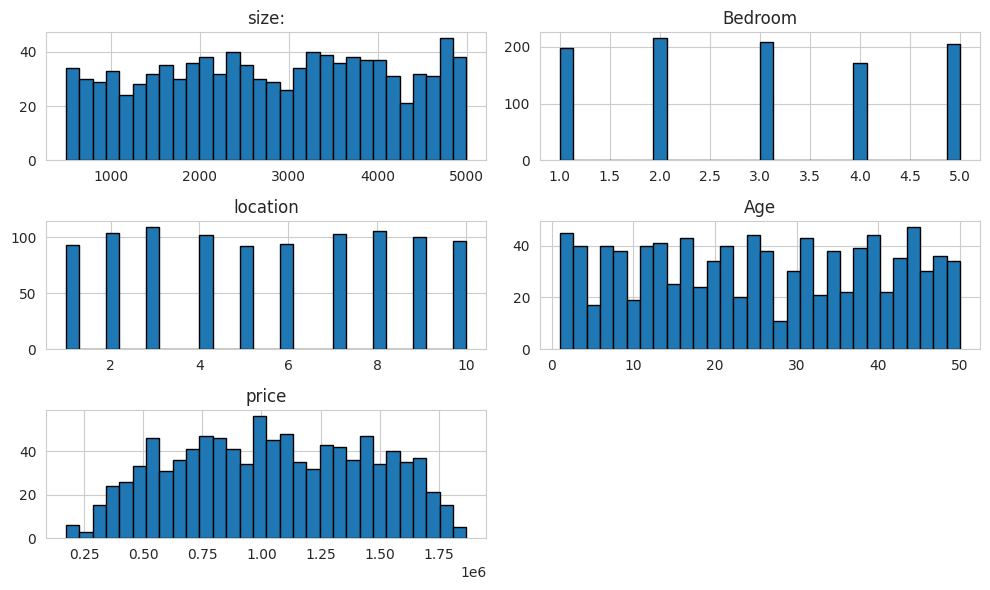

In [4]:
import numpy as  np
import pandas as pd
np.random.seed(4)
size  = np.random.randint(500,5000,1000)
bedrooms = np.random.randint(1,6,1000)
location = np.random.randint(1,11,1000)
age = np.random.randint(1,51,1000)
price = (size * 300) + (bedrooms * 50000) + (location * 20000) - (age * 2000) + np.random.randint(-20000,20000,1000)

df = pd.DataFrame({"size:" :size, "Bedroom" : bedrooms, "location" :location, "Age" :age,"price":price})
csv_filename = "House_price_data.csv"
df.to_csv(csv_filename, index = False)
print(f"Dataset saved as '{csv_filename}'with {df.shape[0]} rows and {df.shape[1]} coumns.")
df = pd.read_csv("House_price_data.csv")
print(df.head())
df = pd.read_csv("House_price_data.csv")
print(df.head())
print("\nMissing values:\n", df.isnull().sum())
print("\n Dataset Summary:\n", df.describe())
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
df.hist(figsize=(10,6) , bins = 30, edgecolor = "black")
plt.tight_layout()
plt.show()


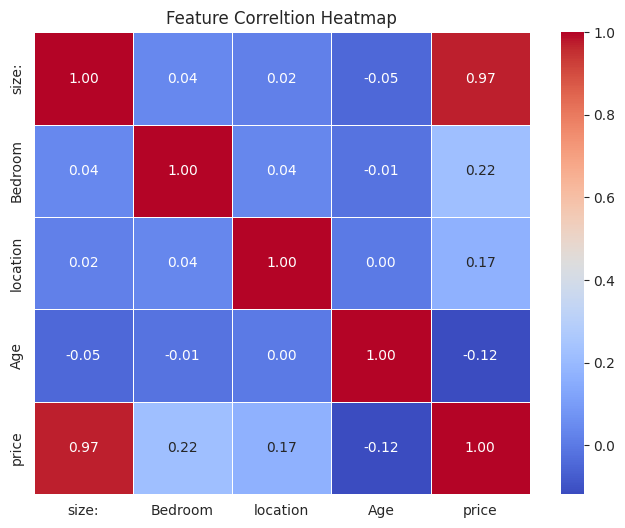

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=  True, cmap = "coolwarm", fmt = ".2f", linewidth = 0.5)
plt.title("Feature Correltion Heatmap")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

x = df[["size:","Bedroom", "location", "Age"]]
y = df["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

# Train Linear Regression Model
model = LinearRegression()
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Model Performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel performance:\nMAE:{mae:.2f},R2 score:{r2:.2f}")


Model performance:
MAE:10084.50,R2 score:1.00


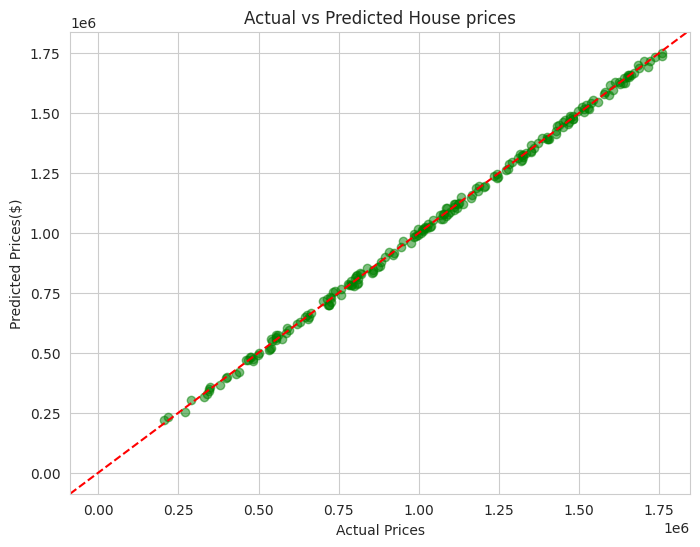

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.5,color = "green")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices($)")
plt.title("Actual vs Predicted House prices")
plt.axline([0,0], slope = 1,color = "red",linestyle ="--")
plt.show()